# Лабораторная работа 4.9

# Исследование гальванометра

In [2]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
from sklearn.metrics import mean_squared_error
from IPython.display import Image 
from scipy.interpolate import interp1d
#%matplotlib inline
def mnkGP(x,y):
    d = 1 # степень полинома
    fp, residuals, rank, sv, rcond = sp.polyfit(x, y, d, full=True) # Модель
    f = sp.poly1d(fp) # аппроксимирующая функция
    y1=[fp[0]*x[i]+fp[1] for i in range(0,len(x))] # значения функции a*x+b
    so=round(sum([abs(y[i]-y1[i]) for i in range(0,len(x))])/(len(x)*sum(y))*100,4) # средняя ошибка
    fx = sp.linspace(x[0], x[-1] + 1, len(x)) # можно установить вместо len(x) большее число для интерполяции
    #plt.plot(x, y, 'o', label='Original data', markersize=10)
    #plt.plot(fx, f(fx))
    #plt.grid(True)
    #plt.ylabel('I')
    #plt.xlabel('U')
    #plt.title(f'$I_p$ = {round(fp[1],3)} mA')
    #plt.show()
    return fp[0], fp[1], so




/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Устройство гальванометра

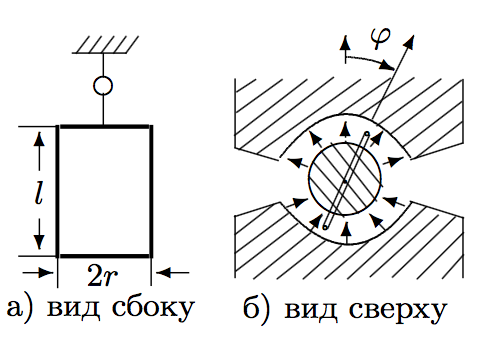

In [3]:
Image(filename='/Users/yaroslavtominin/Desktop/MIPT/лабы/электричество/lab5.png')

## Электрическая цепь

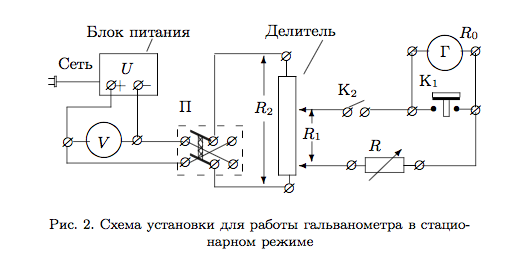

In [4]:
Image(filename='/Users/yaroslavtominin/Desktop/MIPT/лабы/электричество/lab5_2.png')

## Снятие зависимости отклонения зайчика $\textbf{x}$ от сопротивления магазина $\textbf{R}$

In [9]:
R=np.array([5400,6400,7300,8800,9900,12900,14900,25900])
x=np.array([24,20.0,17.6,14.5,12.8,9.5,8.1,4.1])
d_x=np.array([0.4 for i in range(0,8)])
d_R=R*0.005
U_0_1=1.5
R_1_div_R_2_1=1.0/2000
R_2_1=10000
R_0_1=580
a=pd.DataFrame({'R, Om':R,'∆R,Om':d_R,'x,cm':x,'∆x,cm':d_x})
a

,"R, Om","x,cm","∆R,Om","∆x,cm"
0,5400,24.0,27.0,0.4
1,6400,20.0,32.0,0.4
2,7300,17.6,36.5,0.4
3,8800,14.5,44.0,0.4
4,9900,12.8,49.5,0.4
5,12900,9.5,64.5,0.4
6,14900,8.1,74.5,0.4
7,25900,4.1,129.5,0.4


## Обработка результатов

## $I=U_0 \frac{R_1}{R_2} \frac{1}{R+R_0}$

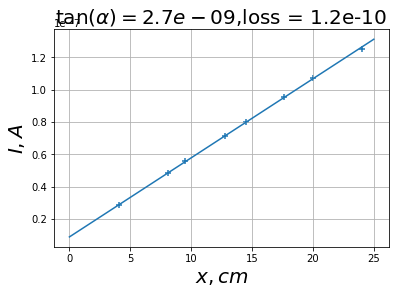

In [10]:
I=U_0_1*R_1_div_R_2_1/(R+R_0_1)
nu_1 = I
tau_1 = x
k_1, b_1, loss_1 = mnkGP(tau_1, nu_1)
x_tan_1 = np.linspace(0,25,10)
y_tan_1 = k_1*x_tan_1 + b_1
plt.plot(x_tan_1, y_tan_1)
plt.scatter(tau_1, nu_1, marker='+')
plt.ylabel(r'$I, A$', fontsize=20)
plt.xlabel(r"$x, cm$", fontsize=20)
plt.title(r"$\tan(\alpha) = {2.7e-09} $,loss = 1.2e-10", fontsize=20)
#plt.title(r"$\tan(\alpha) = {} ,∆\tan(\alpha) = 1.2e - 10".format(round(k_1, 10)), fontsize=20)
plt.grid(True)

### Нахождение динамической постоянной

# $C_1=\frac{I}{\frac{x}{2a}}$

In [13]:
C_1=k_1/1000*2.2
d_C_1=0.12/2.7*C_1
#print(d_C_1)
print(f"Динамическая постоянная $C_1$:(59+-5)e-13,A/[mm/m]")

Динамическая постоянная $C_1$:(59+-5)e-13,A/[mm/m]


## Измерение логарифмического декремента затухания $\Theta_0$ в режиме свободных колебаний

## $\Theta_0=\ln{\frac{x_n}{x_{n+1}}}$

In [15]:
Theta_0=np.log(24.0/14.7)/5
print(f"$\Theta_0$:0.098")

$\Theta_0$:0.098


## Измерение $T_0$ свободных колебаний

In [14]:
T_0=34.3/5
d_T_0=0.4/5
print(f'T_0:(6.9+-0.1) c')

T_0:(6.9+-0.1) c


## Измерение отклонений зайчика после размыкания ключа П для расчета $\Theta$

In [18]:
R_2=np.array([9000,11000,13000,15000,17000,19000,24000,30000])
d_R_2=0.005*R_2
A_0=np.array([15.3,23.1,19.5,16.9,14.9,13.4,18.7,16.2])
A_1=np.array([1.3,2.9,3.4,3.7,4.0,4.1,7.6,7.4])

A_0_div_A_1=np.array([15.3/1.3,23.1/2.9,19.5/3.4,16.9/3.7,14.9/4.0,13.4/4.1,18.7/7.6,16.2/7.4]).round(1)
d_A_0_div_A_1=((0.1/A_0+0.1/A_1)*A_0_div_A_1).round(1)
b=pd.DataFrame({'R, Om':R,'∆R,Om':d_R_2,'${A_0}/{A_1}$':A_0_div_A_1,'$∆{A_0}/{A_1}$':d_A_0_div_A_1})
Theta=np.log(A_0_div_A_1)
b

,${A_0}/{A_1}$,$∆{A_0}/{A_1}$,"R, Om","∆R,Om"
0,11.8,1.0,5400,45.0
1,8.0,0.3,6400,55.0
2,5.7,0.2,7300,65.0
3,4.6,0.2,8800,75.0
4,3.7,0.1,9900,85.0
5,3.3,0.1,12900,95.0
6,2.5,0.0,14900,120.0
7,2.2,0.0,25900,150.0


## Построение графика $\frac{1}{\Theta^2}=f[(R_0+R)^{2}]$

# $R_{cr}=\frac{1}{2\pi}\sqrt{\frac{\Delta X}{\Delta Y}}-R_0$

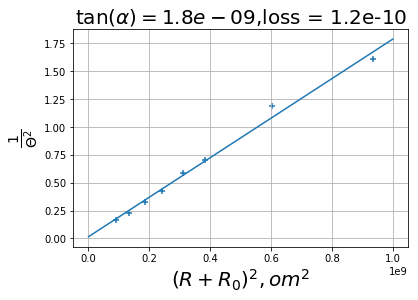

In [18]:
nu_2 = (1/Theta/Theta)
tau_2 = ((R_2+R_0_1)*(R_2+R_0_1))
k_2, b_2, loss_2 = mnkGP(tau_2, nu_2)
x_tan_2 = np.linspace(0,1000000000,10)
y_tan_2 = k_2*x_tan_2 + b_2
#print(x_tan_2)
#print(k_2)
#print(loss_2)
plt.plot(x_tan_2, y_tan_2)
plt.scatter(tau_2, nu_2, marker='+')
plt.ylabel(r'$\frac{1}{\Theta^2}$', fontsize=20)
plt.xlabel(r"$(R+R_0)^2, om^2$", fontsize=20)
plt.title(r"$\tan(\alpha) = {1.8e-09} $,loss = 1.2e-10", fontsize=20)
#plt.title(r"$\tan(\alpha) = {} ,∆\tan(\alpha) = 1.2e - 10".format(round(k_1, 10)), fontsize=20)
plt.grid(True)

In [24]:
d_tg_2=1.2*10**-10
tg_2=1.8*10**-9
R_cr=1.0/2/3.14/(0.18**0.5)*10000-R_0_1
d_R_cr=d_tg_2/tg_2*R_cr
#print(d_R_cr)
print("Сопротивление критическое R_cr=(3200+-200)Om")

Сопротивление критическое R_cr=(3200+-200)Om


## Исследование гальванометра в баллистическом режиме

## $l_{max}=21.4cm$, делитель $\frac{1}{20}$, C=$20мкФ$,2a=$220cm$

In [19]:
R_bal=np.array([50000,45000,40000,30000,20000,10000,7000,6000,5000,4000,3000,2000])
d_R_bal=0.005*R_bal
l_bal=np.array([19.8,19.1,18.5,18.1,17.6,14,12.6,11.9,11,10.2,8.8,7.3])
d_l_bal=np.array([0.3 for i in range(0,12)])
c=pd.DataFrame({'R, Om':R_bal,'∆R,Om':d_R_bal,'$l, cm$':l_bal,'∆l,cm':d_l_bal})
c

,"$l, cm$","R, Om","∆R,Om","∆l,cm"
0,19.8,50000,250.0,0.3
1,19.1,45000,225.0,0.3
2,18.5,40000,200.0,0.3
3,18.1,30000,150.0,0.3
4,17.6,20000,100.0,0.3
5,14.0,10000,50.0,0.3
6,12.6,7000,35.0,0.3
7,11.9,6000,30.0,0.3
8,11.0,5000,25.0,0.3
9,10.2,4000,20.0,0.3


## Построение графика $l_{max}=f[(R_0+R)^{-1}]$


## $C_{Q cr}=\frac{q}{\phi_{max cr}}=2a\frac{R_1}{R_2} \frac{U_0C}{l_{max cr}}$

## Найдем $l_0=l_{max} e^{\frac{\Theta_0}{4}}$

In [20]:
l_0=21.4*np.exp(0.098/4)
l_max_cr=l_0/np.exp(1)
C_ball=2.2*1.5/20*2*10**(-8)/l_max_cr/10
d_C_ball=0.5/21*C_ball
#print(d_C_ball)
print('Баллистическая постоянная C_bal=(41+-1)*10^(-12)[Кл/(мм/м)]')
l_crcr=np.array([l_max_cr for i in range(0,10)])
print('Максимальная амплитуда при критическом сопротивлении l=8.1 cm')

Баллистическая постоянная C_bal=(41+-1)*10^(-12)[Кл/(мм/м)]
Максимальная амплитуда при критическом сопротивлении l=8.1 cm


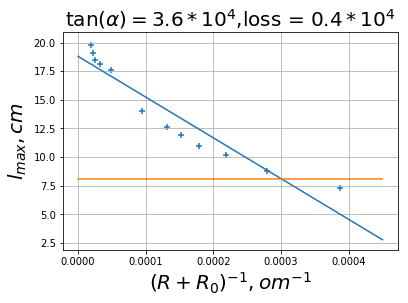

In [21]:
nu_3 = l_bal
tau_3 = (1/(R_bal+R_0_1))
k_3, b_3, loss_3 = mnkGP(tau_3, nu_3)
x_tan_3 = np.linspace(0,0.00045,10)
y_tan_3 = k_3*x_tan_3 + b_3
#print(x_tan_2)
#print(k_3)
#print(loss_3)
plt.plot(x_tan_3, y_tan_3)
plt.plot(x_tan_3,l_crcr)
plt.scatter(tau_3, nu_3, marker='+')
plt.ylabel(r'$l_{max}, cm$', fontsize=20)
plt.xlabel(r"$(R+R_0)^{-1}, om^{-1}$", fontsize=20)
plt.title(r"$\tan(\alpha) = {3.6*10^4} $,loss = $0.4*10^4$", fontsize=20)
#plt.title(r"$\tan(\alpha) = {} ,∆\tan(\alpha) = 1.2e - 10".format(round(k_1, 10)), fontsize=20)
plt.grid(True)

In [22]:
d_tg=4000
R_cr_2=1/0.0003-R_0_1
d_R_cr_2=d_tg/k_3*R_cr_2
print('Критическое сопротивление R_cr=(2800+-300)Om')

Критическое сопротивление R_cr=(2800+-300)Om


### Время релаксации и период свободных колебаний

In [23]:
t=round(R_0_1*20*10**(-9),6)
T_0=34.4/5
print(f"Видим, что t={t} c<<T={T_0} c. Следовательно, мы можем использовать наши формулы.")

Видим, что t=1.2e-05 c<<T=6.88 c. Следовательно, мы можем использовать наши формулы.


# Вывод: исходя из полученных результатов мы можем сказать, что формулы, выводимые из наших предположений, хорошо работают на практике. Примером могут служить графики, которые достаточно близки к линейным. Так же два метода дали одинаковое значение критического сопротивления, совпадающее с действительным.